In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
#produces plots inline with notebook

In [18]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','species']
iris = pd.read_csv(url, names = col_name)
iris

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
iris[iris["sepal-width"]>4]#entries where sepal-width >4

,sepal-length,sepal-width,petal-length,petal-width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


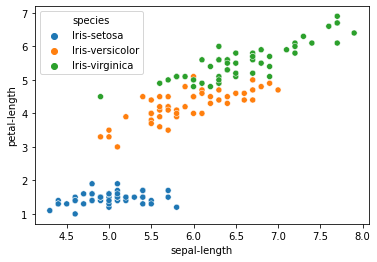

In [20]:
sns.scatterplot(x="sepal-length",y="petal-length",data=iris,hue="species")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split#For splitting it into train and test datas
X=iris[["sepal-width"]]
y=iris[["sepal-length"]]
# 20% of data for testing, rest for training model
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [22]:
X_train.head()

,sepal-width
20,3.4
135,3.0
79,2.6
137,3.1
139,3.1


In [23]:
X_test.head()

,sepal-width
89,2.5
62,2.2
138,3.0
16,3.9
6,3.4


In [24]:
#Modelling using Linear Regression
from sklearn import linear_model
regr = linear_model.LinearRegression()

#NOTE : Here output is not continous value but classification
regr.fit(X_train,y_train)#train this model using training inputs(80% of inputs)

# The coefficients of y=mx+c in linear regression
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.26878909]]
Intercept:  [6.61118677]


In [30]:
y_test.head()#Compare these two, this and below cell

,sepal-length
89,5.5
62,6.0
138,6.0
16,5.4
6,4.6


In [31]:
y_pred =regr.predict(X_test)
y_pred[0:5]

array([[5.93921405],
       [6.01985077],
       [5.8048195 ],
       [5.56290932],
       [5.69730386]])

In [33]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

Mean absolute error: 0.74
Residual sum of squares (MSE): 0.93
